**Recommended Analysis**
* Are there any noticeable sales trends over time?
* Which are the best and worst-selling products?
* Can you identify any key customers?
* Are shipping costs consistent across providers?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv("/kaggle/input/northwind-traders/categories.csv")
df1

,categoryID,categoryName,description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains & Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat & Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [4]:
df1=pd.read_csv("/kaggle/input/northwind-traders/categories.csv")
df1

,categoryID,categoryName,description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains & Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat & Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [5]:
df2=pd.read_csv("/kaggle/input/northwind-traders/customers.csv", encoding='unicode_escape')
df2

,customerID,companyName,contactName,contactTitle,city,country
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Mexico City,Mexico
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mexico City,Mexico
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Luleå,Sweden
...,...,...,...,...,...,...
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Oulu,Finland
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,Resende,Brazil
88,WHITC,White Clover Markets,Karl Jablonski,Owner,Seattle,USA
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Helsinki,Finland


In [6]:
df3=pd.read_csv("/kaggle/input/northwind-traders/employees.csv")
df3

,employeeID,employeeName,title,city,country,reportsTo
0,1,Nancy Davolio,Sales Representative,New York,USA,8.0
1,2,Andrew Fuller,Vice President Sales,New York,USA,NaN
2,3,Janet Leverling,Sales Representative,New York,USA,8.0
3,4,Margaret Peacock,Sales Representative,New York,USA,8.0
4,5,Steven Buchanan,Sales Manager,London,UK,2.0
5,6,Michael Suyama,Sales Representative,London,UK,5.0
6,7,Robert King,Sales Representative,London,UK,5.0
7,8,Laura Callahan,Sales Manager,New York,USA,2.0
8,9,Anne Dodsworth,Sales Representative,London,UK,5.0


In [7]:
df4=pd.read_csv("/kaggle/input/northwind-traders/order_details.csv")
df4

,orderID,productID,unitPrice,quantity,discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
...,...,...,...,...,...
2150,11077,64,33.25,2,0.03
2151,11077,66,17.00,1,0.00
2152,11077,73,15.00,2,0.01
2153,11077,75,7.75,4,0.00


In [8]:
df5=pd.read_csv("/kaggle/input/northwind-traders/orders.csv")
df5

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight
0,10248,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38
1,10249,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,1,11.61
2,10250,HANAR,4,2013-07-08,2013-08-05,2013-07-12,2,65.83
3,10251,VICTE,3,2013-07-08,2013-08-05,2013-07-15,1,41.34
4,10252,SUPRD,4,2013-07-09,2013-08-06,2013-07-11,2,51.30
...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,2015-05-05,2015-06-02,NaN,2,24.95
826,11074,SIMOB,7,2015-05-06,2015-06-03,NaN,2,18.44
827,11075,RICSU,8,2015-05-06,2015-06-03,NaN,2,6.19
828,11076,BONAP,4,2015-05-06,2015-06-03,NaN,2,38.28


In [9]:
df6=pd.read_csv("/kaggle/input/northwind-traders/products.csv",encoding='unicode_escape')
df6

,productID,productName,quantityPerUnit,unitPrice,discontinued,categoryID
0,1,Chai,10 boxes x 20 bags,18.00,0,1
1,2,Chang,24 - 12 oz bottles,19.00,0,1
2,3,Aniseed Syrup,12 - 550 ml bottles,10.00,0,2
3,4,Chef Anton's Cajun Seasoning,48 - 6 oz jars,22.00,0,2
4,5,Chef Anton's Gumbo Mix,36 boxes,21.35,1,2
...,...,...,...,...,...,...
72,73,Röd Kaviar,24 - 150 g jars,15.00,0,8
73,74,Longlife Tofu,5 kg pkg.,10.00,0,7
74,75,Rhönbräu Klosterbier,24 - 0.5 l bottles,7.75,0,1
75,76,Lakkaliköri,500 ml,18.00,0,1


In [10]:
df7=pd.read_csv("/kaggle/input/northwind-traders/shippers.csv")
df7

,shipperID,companyName
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping


In [11]:
# Assuming you have tables named df1, df2, df3, df4, df5, df6, and df7
tables = [df1, df2, df3, df4, df5, df6, df7]

# Iterate over each table and print its column names
for i, table in enumerate(tables):
    print(f"Columns of Table {i+1} ({table.shape}):")
    print(table.columns.tolist())
    print()


Columns of Table 1 ((8, 3)):
['categoryID', 'categoryName', 'description']

Columns of Table 2 ((91, 6)):
['customerID', 'companyName', 'contactName', 'contactTitle', 'city', 'country']

Columns of Table 3 ((9, 6)):
['employeeID', 'employeeName', 'title', 'city', 'country', 'reportsTo']

Columns of Table 4 ((2155, 5)):
['orderID', 'productID', 'unitPrice', 'quantity', 'discount']

Columns of Table 5 ((830, 8)):
['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate', 'shippedDate', 'shipperID', 'freight']

Columns of Table 6 ((77, 6)):
['productID', 'productName', 'quantityPerUnit', 'unitPrice', 'discontinued', 'categoryID']

Columns of Table 7 ((3, 2)):
['shipperID', 'companyName']



In [12]:
L1 = pd.merge(df1,df6,on = 'categoryID')
L1


,categoryID,categoryName,description,productID,productName,quantityPerUnit,unitPrice,discontinued
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.00,0
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,24 - 12 oz bottles,19.00,0
2,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",24,Guarana Fantastica,12 - 355 ml cans,4.50,1
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",34,Sasquatch Ale,24 - 12 oz bottles,14.00,0
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",35,Steeleye Stout,24 - 12 oz bottles,18.00,0
...,...,...,...,...,...,...,...,...
72,8,Seafood,Seaweed and fish,41,Jack's New England Clam Chowder,12 - 12 oz cans,9.65,0
73,8,Seafood,Seaweed and fish,45,Rogede sild,1k pkg.,9.50,0
74,8,Seafood,Seaweed and fish,46,Spegesild,4 - 450 g glasses,12.00,0
75,8,Seafood,Seaweed and fish,58,Escargots de Bourgogne,24 pieces,13.25,0


In [13]:
L2 = pd.merge(df2,df3,on = 'city')
L2

,customerID,companyName,contactName,contactTitle,city,country_x,employeeID,employeeName,title,country_y,reportsTo
0,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,2.0
1,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,6,Michael Suyama,Sales Representative,UK,5.0
2,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,7,Robert King,Sales Representative,UK,5.0
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,9,Anne Dodsworth,Sales Representative,UK,5.0
4,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,2.0
5,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,London,UK,6,Michael Suyama,Sales Representative,UK,5.0
6,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,London,UK,7,Robert King,Sales Representative,UK,5.0
7,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,London,UK,9,Anne Dodsworth,Sales Representative,UK,5.0
8,CONSH,Consolidated Holdings,Elizabeth Brown,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,2.0
9,CONSH,Consolidated Holdings,Elizabeth Brown,Sales Representative,London,UK,6,Michael Suyama,Sales Representative,UK,5.0


In [14]:
L3 = pd.merge(df4,df5,on = 'orderID')
L3

,orderID,productID,unitPrice,quantity,discount,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight
0,10248,11,14.00,12,0.00,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38
1,10248,42,9.80,10,0.00,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38
2,10248,72,34.80,5,0.00,VINET,5,2013-07-04,2013-08-01,2013-07-16,3,32.38
3,10249,14,18.60,9,0.00,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,1,11.61
4,10249,51,42.40,40,0.00,TOMSP,6,2013-07-05,2013-08-16,2013-07-10,1,11.61
...,...,...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,RATTC,1,2015-05-06,2015-06-03,NaN,2,8.53
2151,11077,66,17.00,1,0.00,RATTC,1,2015-05-06,2015-06-03,NaN,2,8.53
2152,11077,73,15.00,2,0.01,RATTC,1,2015-05-06,2015-06-03,NaN,2,8.53
2153,11077,75,7.75,4,0.00,RATTC,1,2015-05-06,2015-06-03,NaN,2,8.53


In [15]:
L = pd.merge(L1,L3,on = 'productID')
L

,categoryID,categoryName,description,productID,productName,quantityPerUnit,unitPrice_x,discontinued,orderID,unitPrice_y,quantity,discount,customerID,employeeID,orderDate,requiredDate,shippedDate,shipperID,freight
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.0,0,10285,14.4,45,0.20,QUICK,1,2013-08-20,2013-09-17,2013-08-26,2,76.83
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.0,0,10294,14.4,18,0.00,RATTC,4,2013-08-30,2013-09-27,2013-09-05,2,147.26
2,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.0,0,10317,14.4,20,0.00,LONEP,6,2013-09-30,2013-10-28,2013-10-10,1,12.69
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.0,0,10348,14.4,15,0.15,WANDK,4,2013-11-07,2013-12-05,2013-11-15,2,0.78
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,10 boxes x 20 bags,18.0,0,10354,14.4,12,0.00,PERIC,8,2013-11-14,2013-12-12,2013-11-20,3,53.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,8,Seafood,Seaweed and fish,73,Röd Kaviar,24 - 150 g jars,15.0,0,10693,15.0,15,0.15,WHITC,3,2014-10-06,2014-10-20,2014-10-10,3,139.34
2151,8,Seafood,Seaweed and fish,73,Röd Kaviar,24 - 150 g jars,15.0,0,10703,15.0,35,0.00,FOLKO,6,2014-10-14,2014-11-11,2014-10-20,2,152.30
2152,8,Seafood,Seaweed and fish,73,Röd Kaviar,24 - 150 g jars,15.0,0,10751,15.0,15,0.00,RICSU,3,2014-11-24,2014-12-22,2014-12-03,3,130.79
2153,8,Seafood,Seaweed and fish,73,Röd Kaviar,24 - 150 g jars,15.0,0,10881,15.0,10,0.00,CACTU,4,2015-02-11,2015-03-11,2015-02-18,1,2.84


In [16]:
df = pd.merge(L2,L,on = 'employeeID' )
df

,customerID_x,companyName,contactName,contactTitle,city,country_x,employeeID,employeeName,title,country_y,...,orderID,unitPrice_y,quantity,discount,customerID_y,orderDate,requiredDate,shippedDate,shipperID,freight
0,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,...,10477,14.40,15,0.00,PRINI,2014-03-17,2014-04-14,2014-03-25,2,13.02
1,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,...,10869,18.00,40,0.00,SEVES,2015-02-04,2015-03-04,2015-02-09,1,143.28
2,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,...,10714,19.00,30,0.25,SAVEA,2014-10-22,2014-11-19,2014-10-27,3,24.49
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,...,10851,19.00,5,0.05,RICAR,2015-01-26,2015-02-23,2015-02-02,1,160.55
4,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK,5,Steven Buchanan,Sales Manager,UK,...,10866,19.00,21,0.25,BERGS,2015-02-03,2015-03-03,2015-02-12,1,109.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,London,UK,9,Anne Dodsworth,Sales Representative,UK,...,10978,18.40,10,0.00,MAISD,2015-03-26,2015-04-23,2015-04-23,2,32.82
3404,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,London,UK,9,Anne Dodsworth,Sales Representative,UK,...,10411,7.70,25,0.20,BOTTM,2014-01-10,2014-02-07,2014-01-21,3,23.65
3405,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,London,UK,9,Anne Dodsworth,Sales Representative,UK,...,10951,9.65,6,0.05,RICSU,2015-03-16,2015-04-27,2015-04-07,2,30.85
3406,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,London,UK,9,Anne Dodsworth,Sales Representative,UK,...,10750,9.50,40,0.15,WARTH,2014-11-21,2014-12-19,2014-11-24,1,79.30


In [17]:
df.describe()

,employeeID,reportsTo,categoryID,productID,unitPrice_x,discontinued,orderID,unitPrice_y,quantity,discount,shipperID,freight
count,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000,3408.000000
mean,6.669014,4.382042,4.033451,40.732394,27.402412,0.119718,10656.848592,25.845246,24.448944,0.065493,2.007042,100.200229
std,1.328234,1.213439,2.323814,22.377160,31.043815,0.324679,233.180811,28.949181,19.345856,0.085682,0.787306,143.098896
min,5.000000,2.000000,1.000000,1.000000,2.500000,0.000000,10248.000000,2.000000,1.000000,0.000000,1.000000,0.120000
25%,6.000000,5.000000,2.000000,21.000000,12.500000,0.000000,10475.000000,11.200000,10.000000,0.000000,1.000000,15.252500
50%,6.000000,5.000000,4.000000,40.000000,19.000000,0.000000,10655.000000,18.400000,20.000000,0.000000,2.000000,48.185000
75%,7.000000,5.000000,6.000000,60.000000,34.000000,0.000000,10856.250000,32.800000,30.000000,0.150000,3.000000,127.340000
max,9.000000,5.000000,8.000000,77.000000,263.500000,1.000000,11074.000000,263.500000,130.000000,0.250000,3.000000,890.780000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID_x     3408 non-null   object 
 1   companyName      3408 non-null   object 
 2   contactName      3408 non-null   object 
 3   contactTitle     3408 non-null   object 
 4   city             3408 non-null   object 
 5   country_x        3408 non-null   object 
 6   employeeID       3408 non-null   int64  
 7   employeeName     3408 non-null   object 
 8   title            3408 non-null   object 
 9   country_y        3408 non-null   object 
 10  reportsTo        3408 non-null   float64
 11  categoryID       3408 non-null   int64  
 12  categoryName     3408 non-null   object 
 13  description      3408 non-null   object 
 14  productID        3408 non-null   int64  
 15  productName      3408 non-null   object 
 16  quantityPerUnit  3408 non-null   object 
 17  unitPrice_x   

# 1.Are there any noticeable sales trends over time?

In [19]:
import pandas as pd

# Convert 'orderDate' column to datetime data type
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Extract year and month from 'orderDate' to analyze sales trends
df['orderYear'] = df['orderDate'].dt.year
df['orderMonth'] = df['orderDate'].dt.month

# Group by year and calculate total sales for each year
sales_by_year = df.groupby('orderYear')['freight'].sum()

# Group by month and calculate total sales for each month
sales_by_month = df.groupby(['orderYear', 'orderMonth'])['freight'].sum()

# Print the total sales for each year
print("Total sales by year:")
print(sales_by_year)

# Print the total sales for each month
print("\nTotal sales by month:")
print(sales_by_month)


Total sales by year:
orderYear
2013     66852.90
2014    139095.66
2015    135533.82
Name: freight, dtype: float64

Total sales by month:
orderYear  orderMonth
2013       7              8299.92
           8              2252.34
           9              6144.72
           10             9295.74
           11            12184.26
           12            28675.92
2014       1             10793.58
           2              4861.80
           3              7695.30
           4             10732.32
           5              8109.96
           6             16171.56
           7             12222.78
           8             23201.52
           9             24258.24
           10             9143.34
           11             7556.58
           12             4348.68
2015       1             39586.74
           2             24866.10
           3             19575.54
           4             50589.84
           5               915.60
Name: freight, dtype: float64


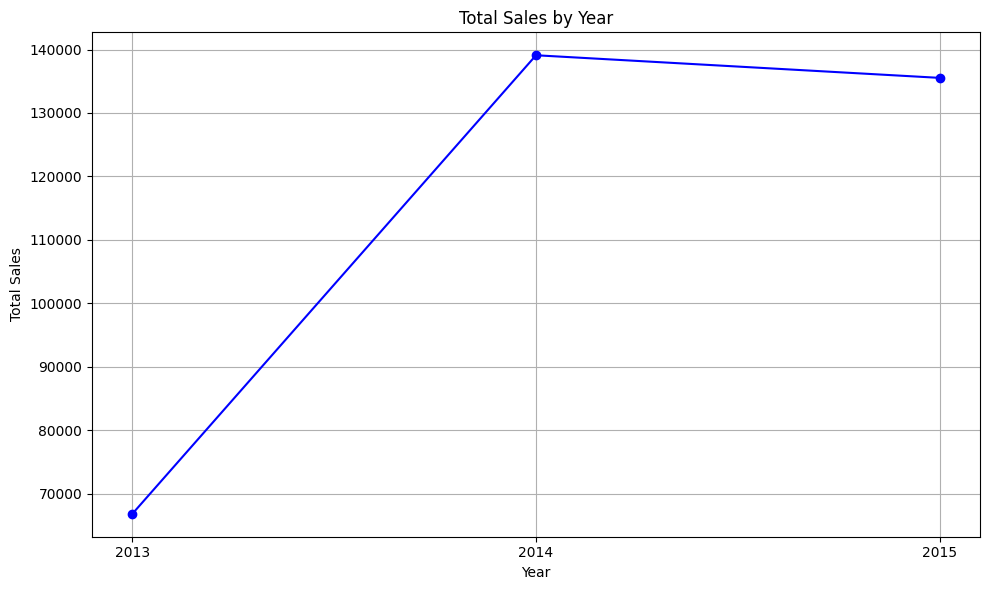

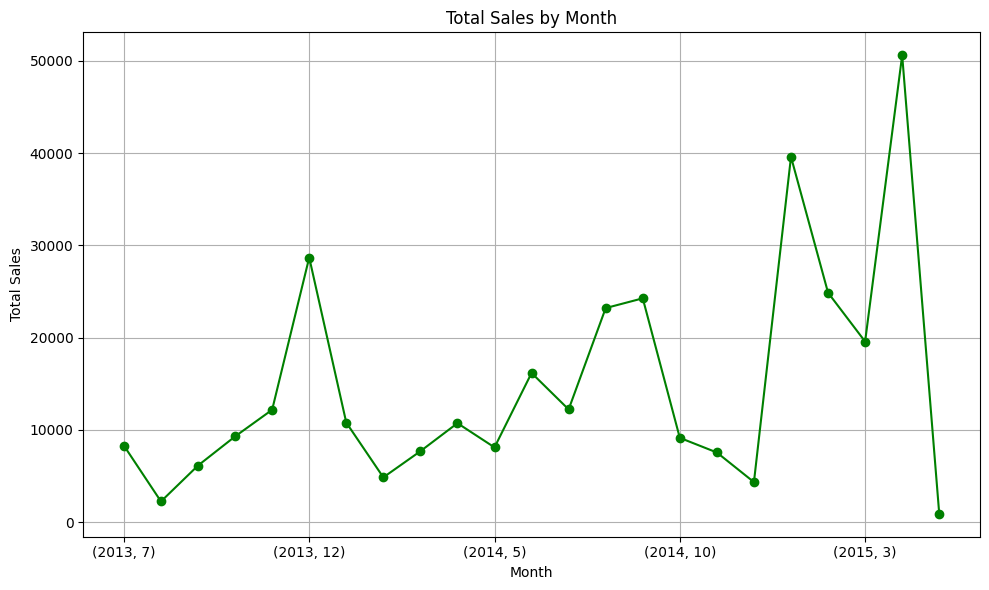

In [20]:
import matplotlib.pyplot as plt

# Plot total sales by year
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(sales_by_year.index)  # Set x-axis ticks to match years
plt.tight_layout()
plt.show()

# Plot total sales by month
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o', color='green')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# 2.Which are the best and worst-selling products?

In [21]:
# Calculate total quantity sold for each product
product_sales = df.groupby('productName')['quantity'].sum()

# Sort products by total quantity sold
product_sales_sorted = product_sales.sort_values(ascending=False)

# Best-selling product (product with the highest total quantity sold)
best_selling_product = product_sales_sorted.index[0]
best_selling_quantity = product_sales_sorted.iloc[0]

# Worst-selling product (product with the lowest total quantity sold)
worst_selling_product = product_sales_sorted.index[-1]
worst_selling_quantity = product_sales_sorted.iloc[-1]

print("Best-selling product:", best_selling_product)
print("Total quantity sold:", best_selling_quantity)
print()
print("Worst-selling product:", worst_selling_product)
print("Total quantity sold:", worst_selling_quantity)


Best-selling product: Raclette Courdavault
Total quantity sold: 4680

Worst-selling product: Genen Shouyu
Total quantity sold: 72


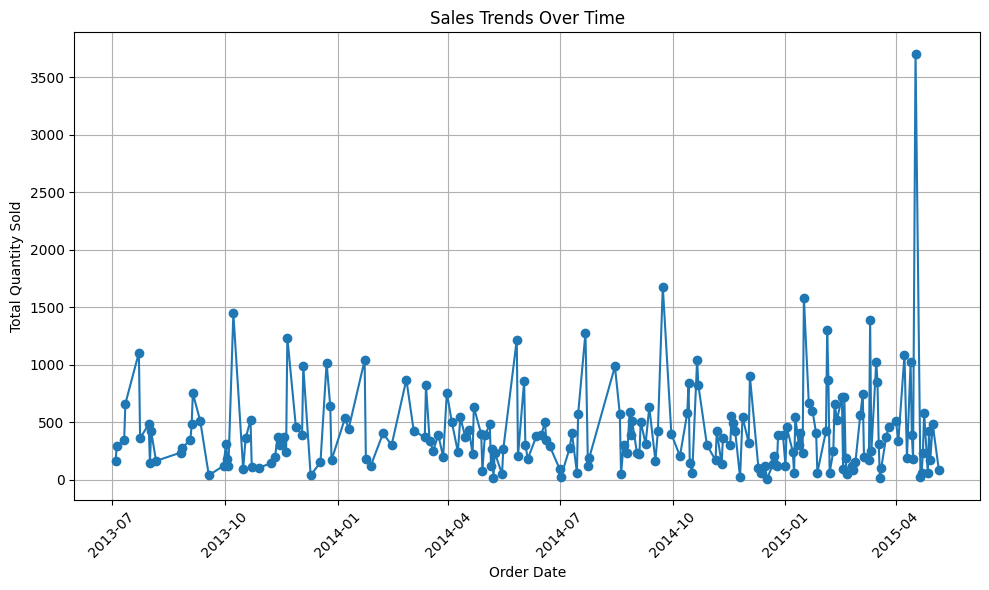

In [22]:
import matplotlib.pyplot as plt

# Convert 'orderDate' column to datetime format
df['orderDate'] = pd.to_datetime(df['orderDate'])

# Group by 'orderDate' and sum the quantities
daily_sales = df.groupby('orderDate')['quantity'].sum()

# Plotting the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.Can you identify any key customers?

In [24]:
# Calculate total purchase amount for each customer
df['total_purchase_amount'] = df['unitPrice_y'] * df['quantity']

# Group by customerID and sum the total purchase amount
total_purchase_per_customer = df.groupby('customerID_x')['total_purchase_amount'].sum()

# Sort customers based on total purchase amount in descending order
top_customers_by_purchase = total_purchase_per_customer.sort_values(ascending=False)

# Display top 5 customers by purchase amount
print("Top 5 customers by total purchase amount:")
print(top_customers_by_purchase.head())


Top 5 customers by total purchase amount:
customerID_x
AROUT    378025.84
BSBEV    378025.84
CONSH    378025.84
EASTC    378025.84
NORTS    378025.84
Name: total_purchase_amount, dtype: float64


In [25]:
# Count number of orders placed by each customer
orders_per_customer = df.groupby('customerID_x')['orderID'].nunique()

# Sort customers based on number of orders in descending order
top_customers_by_orders = orders_per_customer.sort_values(ascending=False)

# Display top 5 customers by number of orders
print("\nTop 5 customers by number of orders:")
print(top_customers_by_orders.head())



Top 5 customers by number of orders:
customerID_x
AROUT    224
BSBEV    224
CONSH    224
EASTC    224
NORTS    224
Name: orderID, dtype: int64


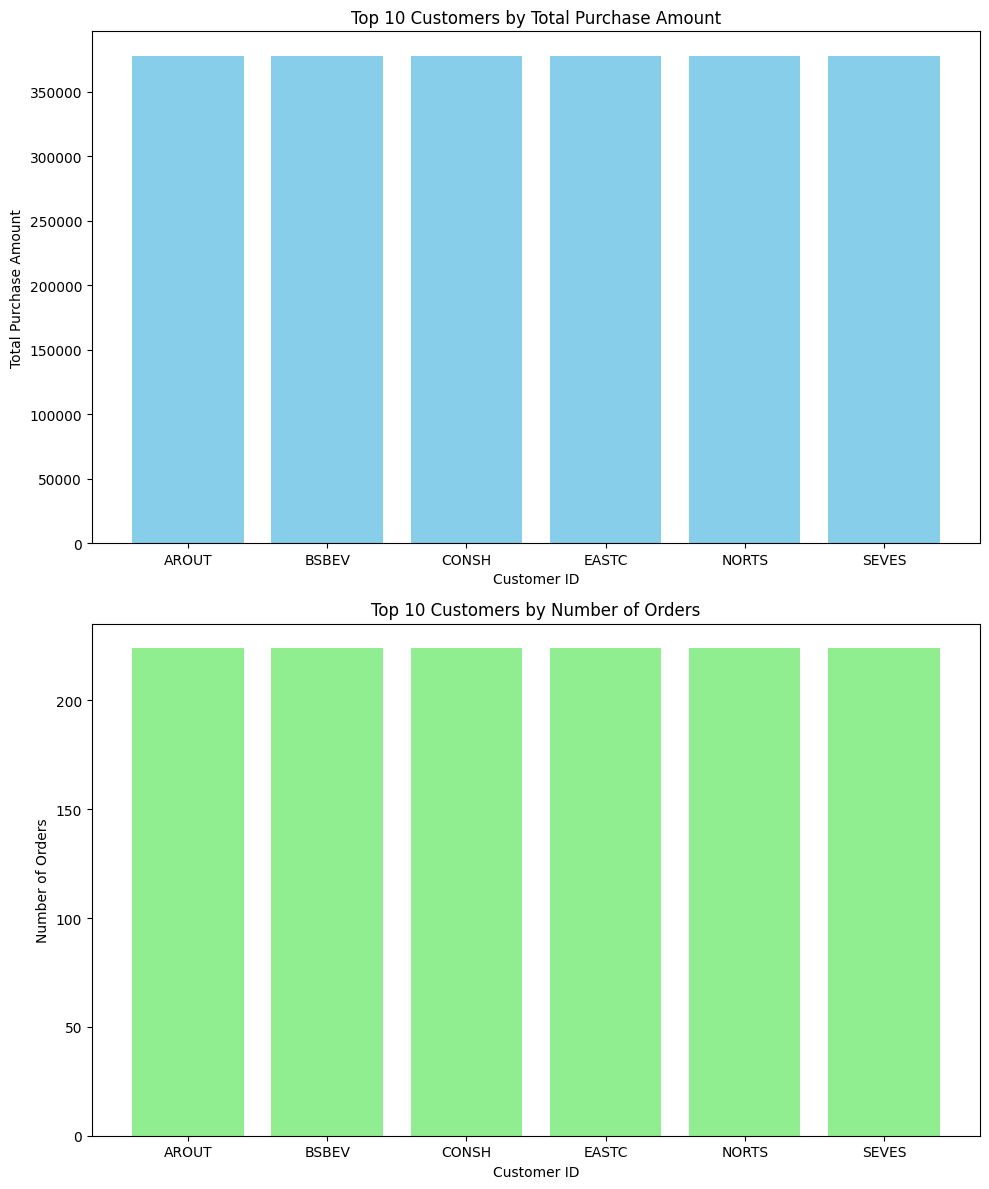

In [26]:

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot for total purchase amount
axes[0].bar(top_customers_by_purchase.head(10).index, top_customers_by_purchase.head(10), color='skyblue')
axes[0].set_title('Top 10 Customers by Total Purchase Amount')
axes[0].set_xlabel('Customer ID')
axes[0].set_ylabel('Total Purchase Amount')

# Plot for number of orders
axes[1].bar(top_customers_by_orders.head(10).index, top_customers_by_orders.head(10), color='lightgreen')
axes[1].set_title('Top 10 Customers by Number of Orders')
axes[1].set_xlabel('Customer ID')
axes[1].set_ylabel('Number of Orders')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


# 4.Are shipping costs consistent across providers?

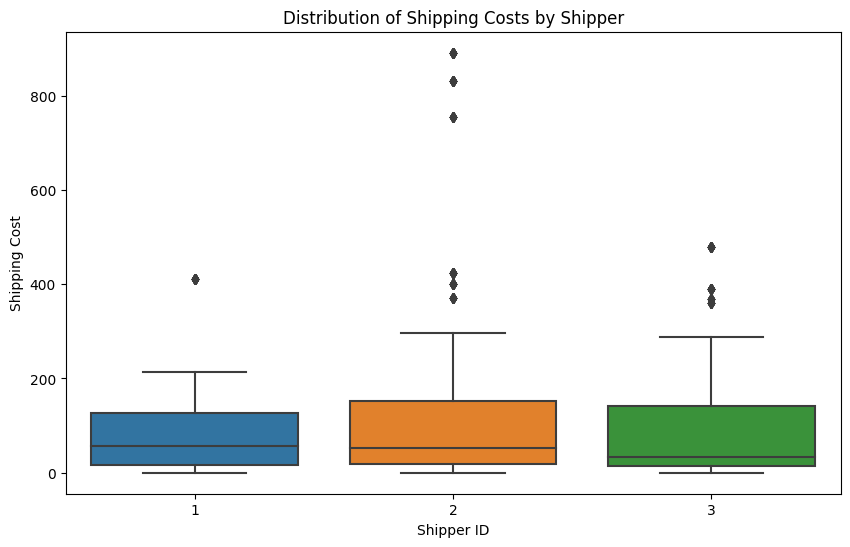

In [27]:
import seaborn as sns

# Group the data by shipperID and calculate the mean shipping cost for each shipper
shipping_costs_by_shipper = df.groupby('shipperID')['freight'].mean()

# Plot the distribution of shipping costs for each shipper
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipperID', y='freight', data=df)
plt.title('Distribution of Shipping Costs by Shipper')
plt.xlabel('Shipper ID')
plt.ylabel('Shipping Cost')
plt.show()


In [28]:
# Group the data by shipperID and calculate summary statistics for shipping costs
shipping_costs_summary = df.groupby('shipperID')['freight'].agg(['mean', 'median', 'std'])

# Display the summary statistics
print("Summary statistics for shipping costs by shipper:")
print(shipping_costs_summary)


Summary statistics for shipping costs by shipper:
                 mean  median         std
shipperID                                
1           81.896667  57.725   84.436951
2          125.413333  52.410  191.132589
3           87.496798  32.450  113.211122
